# Dataset result Analysis

In [15]:
import pandas as pd
import warnings
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
# Functions: 
def load_data(sheet_name: str):
    """Load data from an Excel file."""
    warnings.simplefilter(action='ignore', category=UserWarning)
    return pd.read_excel("./result/Dataset-Info.xlsx", sheet_name)

In [3]:
# Load data
lfw_result = load_data('LFW_Result_(benchmark-fair)')
lfw_result = lfw_result.iloc[:,:12]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plot bar charts for each Model in lfw_result
def plot_accuracy(dataframe):
    """Plot bar charts for each Model in lfw_result"""
    plt.figure(figsize=(25, 8))
    plt.title("LFW dataset")
    plt.xlabel('Accuracy')
    plt.ylabel('Dataset')
    sns.lineplot(x=dataframe["Description"], y=dataframe['Accuracy'],hue=dataframe["Model"])
    plt.grid(True)
    plt.show()

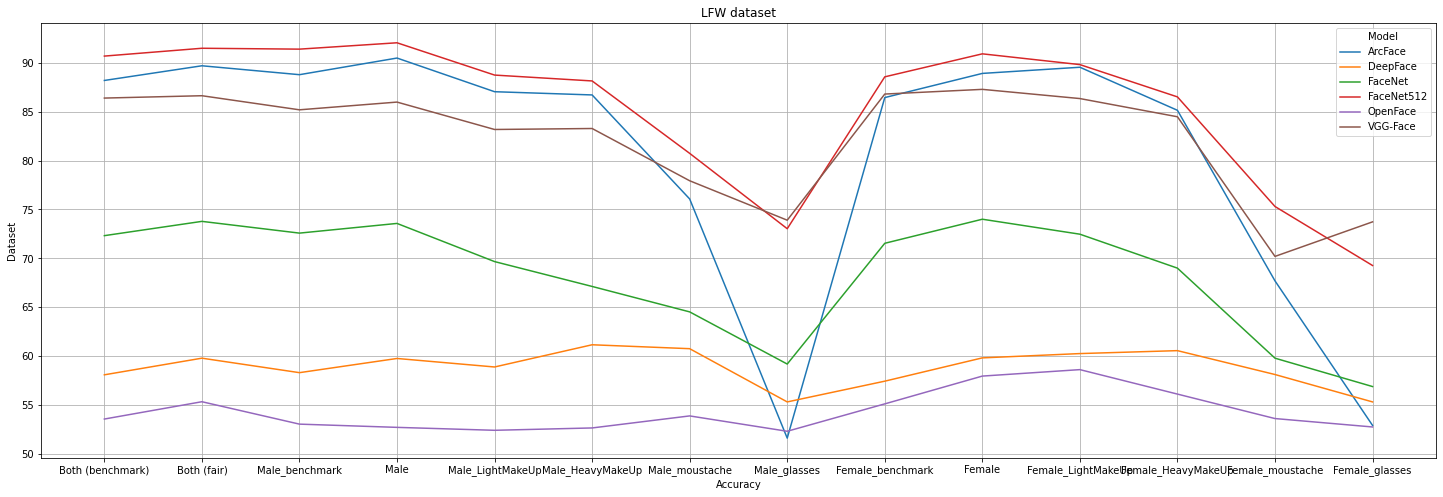

In [16]:
plot_accuracy(lfw_result)

In [17]:
# model result analysis: 
models = [{"index": index+1, "model_name": i} for index,i in enumerate(lfw_result["Model"].unique())]

def models_performance_analysis(model):
    dataset_types = ["Benchmark", "Fair", "LightMakeUp", "HeavyMakeUp", "Moustache", "Glasses"]
    m_index = model["index"]
    new_model = pd.DataFrame({"Dataset_type": dataset_types, "Male":[0 for _ in range(len(dataset_types))], 
                                                            "Female": [0 for _ in range(len(dataset_types))]})
    for i in range(2,8):
        new_model.iloc[i-2, 1] = lfw_result.iloc[ i * m_index]["Accuracy"]
        new_model.iloc[i-2, 2] = lfw_result.iloc[ i * m_index + len(dataset_types)]["Accuracy"]
    return new_model

<AxesSubplot:xlabel='Dataset_type'>

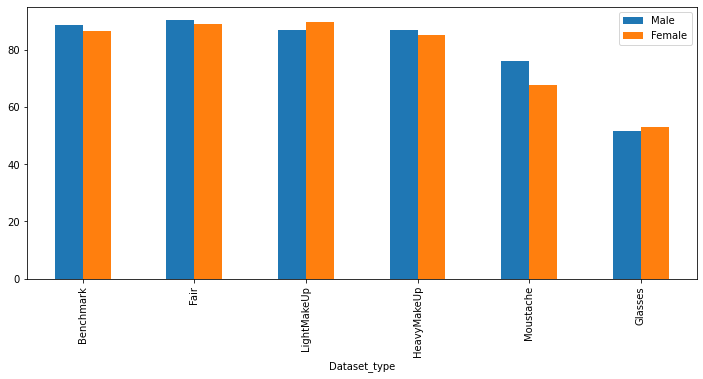

In [18]:
arcface_df = models_performance_analysis(models[0])
arcface_df.plot(x="Dataset_type", y=["Male","Female"], kind="bar", figsize=(12,5))

<AxesSubplot:xlabel='Dataset_type'>

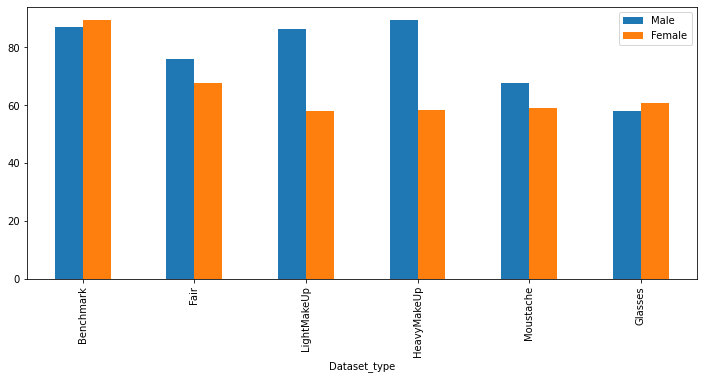

In [19]:
deepface_df = models_performance_analysis(models[1])
deepface_df.plot(x="Dataset_type", y=["Male","Female"], kind="bar", figsize=(12,5))

<AxesSubplot:xlabel='Dataset_type'>

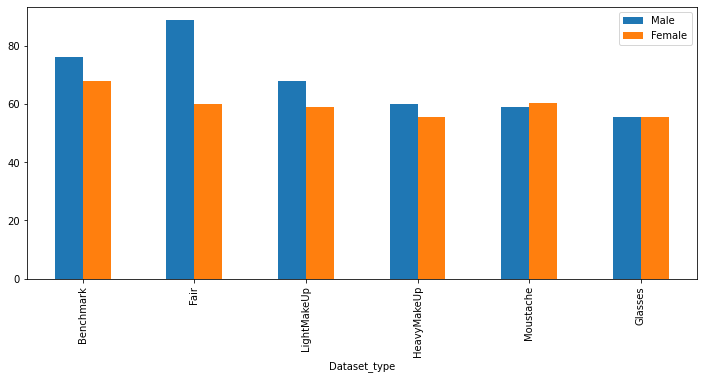

In [20]:
facenet_df = models_performance_analysis(models[2])
facenet_df.plot(x="Dataset_type", y=["Male","Female"], kind="bar", figsize=(12,5))

<AxesSubplot:xlabel='Dataset_type'>

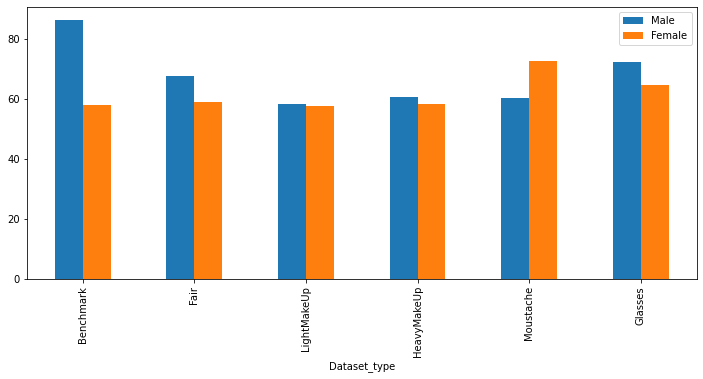

In [21]:
facenet512_df = models_performance_analysis(models[3])
facenet512_df.plot(x="Dataset_type", y=["Male","Female"], kind="bar", figsize=(12,5))

<AxesSubplot:xlabel='Dataset_type'>

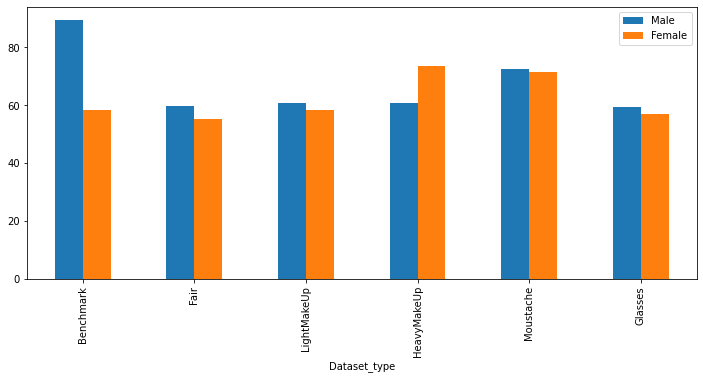

In [22]:
openface_df = models_performance_analysis(models[4])
openface_df.plot(x="Dataset_type", y=["Male","Female"], kind="bar", figsize=(12,5))

<AxesSubplot:xlabel='Dataset_type'>

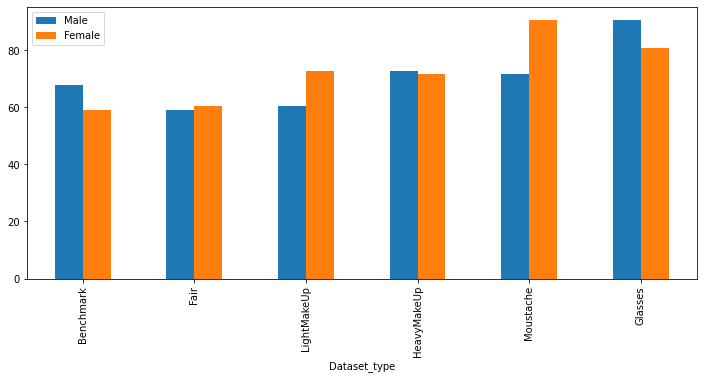

In [23]:
vggface_df = models_performance_analysis(models[5])
vggface_df.plot(x="Dataset_type", y=["Male","Female"], kind="bar", figsize=(12,5))